# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import weather API key from api_keys.py 
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating empty lists which will later be used to create dataframe
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record_counter = 0
set_counter = 1

# Print log
print("Beginning Data Retrieval ")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
search_url = f"{url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for i in range(len(cities)):
    try:
        response = requests.get(search_url + cities[i]).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if record_counter > 49:
            record_counter = 0
            set_counter = set_counter + 1
    
        else:
            record_counter = record_counter + 1
            
        print(f"Processing Record {record_counter} of Set {set_counter} : {cities[i]}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
    # Wait 1 sec to make another api request to avoid limit error
    time.sleep(1)
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : omboue
Processing Record 2 of Set 1 : zacualpan
Processing Record 3 of Set 1 : fortuna
Processing Record 4 of Set 1 : norman wells
Processing Record 5 of Set 1 : punta arenas
Processing Record 6 of Set 1 : puerto ayora
Processing Record 7 of Set 1 : mao
City not found. Skipping...
Processing Record 8 of Set 1 : inongo
Processing Record 9 of Set 1 : rikitea
Processing Record 10 of Set 1 : vicuna
Processing Record 11 of Set 1 : khatanga
Processing Record 12 of Set 1 : shelburne
Processing Record 13 of Set 1 : springbok
Processing Record 14 of Set 1 : coahuayana
Processing Record 15 of Set 1 : kovur
City not found. Skipping...
Processing Record 16 of Set 1 : mataura
Processing Record 17 of Set 1 : kruisfontein
Processing Record 18 of Set 1 : tomatlan
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 1 : cabo san lucas
Processing Record 20 of Set 1 : ribeira grande
Proce

Processing Record 35 of Set 4 : taquara
Processing Record 36 of Set 4 : yulara
City not found. Skipping...
Processing Record 37 of Set 4 : namikupa
Processing Record 38 of Set 4 : cockburn town
Processing Record 39 of Set 4 : san felipe
Processing Record 40 of Set 4 : kautokeino
Processing Record 41 of Set 4 : sinnamary
Processing Record 42 of Set 4 : lethem
Processing Record 43 of Set 4 : chingirlau
Processing Record 44 of Set 4 : pozoblanco
Processing Record 45 of Set 4 : urucara
Processing Record 46 of Set 4 : saint-augustin
Processing Record 47 of Set 4 : isangel
Processing Record 48 of Set 4 : kjollefjord
Processing Record 49 of Set 4 : agirish
Processing Record 50 of Set 4 : harper
Processing Record 0 of Set 5 : pitimbu
Processing Record 1 of Set 5 : narsaq
Processing Record 2 of Set 5 : chokurdakh
Processing Record 3 of Set 5 : san nicolas guadalupe
Processing Record 4 of Set 5 : oksovskiy
City not found. Skipping...
Processing Record 5 of Set 5 : sakakah
Processing Record 6 of 

Processing Record 22 of Set 8 : richards bay
Processing Record 23 of Set 8 : akersberga
Processing Record 24 of Set 8 : okhotsk
Processing Record 25 of Set 8 : whitehorse
Processing Record 26 of Set 8 : westport
Processing Record 27 of Set 8 : tam ky
Processing Record 28 of Set 8 : sijunjung
Processing Record 29 of Set 8 : alice springs
Processing Record 30 of Set 8 : angoche
Processing Record 31 of Set 8 : hays
Processing Record 32 of Set 8 : xining
Processing Record 33 of Set 8 : parati
Processing Record 34 of Set 8 : belaya gora
Processing Record 35 of Set 8 : seymchan
Processing Record 36 of Set 8 : oshogbo
Processing Record 37 of Set 8 : esperance
Processing Record 38 of Set 8 : nizhnyaya tavda
Processing Record 39 of Set 8 : cherskiy
Processing Record 40 of Set 8 : shache
Processing Record 41 of Set 8 : macrohon
Processing Record 42 of Set 8 : kiunga
Processing Record 43 of Set 8 : iskateley
Processing Record 44 of Set 8 : lima
Processing Record 45 of Set 8 : buinsk
Processing Re

Processing Record 7 of Set 12 : pisco
Processing Record 8 of Set 12 : koprivnica
Processing Record 9 of Set 12 : poum
Processing Record 10 of Set 12 : gobabis
Processing Record 11 of Set 12 : consuelo
Processing Record 12 of Set 12 : mayumba
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 12 : takhtamygda
Processing Record 14 of Set 12 : gimli
Processing Record 15 of Set 12 : norsup
Processing Record 16 of Set 12 : porto velho
Processing Record 17 of Set 12 : klaksvik
Processing Record 18 of Set 12 : hay river
Processing Record 19 of Set 12 : boddam
Processing Record 20 of Set 12 : kalyazin
City not found. Skipping...
Processing Record 21 of Set 12 : shwebo
Processing Record 22 of Set 12 : kloulklubed
Processing Record 23 of Set 12 : nalut
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe using data retrieved from API requests
curr_weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Datetime" : date               
                })
# export  data into a csv file
curr_weather_df.to_csv(output_data_file, index = False)
curr_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Datetime
0,Omboué,-1.57,9.26,76.35,91,88,5.70,GA,1607313768
1,Zacualpan,21.25,-105.17,72.00,88,90,3.83,MX,1607313768
2,Fortuna,40.60,-124.16,46.00,93,38,3.74,US,1607313769
3,Norman Wells,65.28,-126.83,1.40,91,75,2.24,CA,1607313543
4,Punta Arenas,-53.15,-70.92,59.00,67,100,17.22,CL,1607313433


In [5]:
# Describe the dataframe to find outliers
curr_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Datetime
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,21.148887,16.688545,51.799315,76.392123,54.734589,7.741318,1.607314e+09
std,33.364591,92.178485,27.413918,19.328842,39.513158,5.334002,7.907979e+01
min,-54.800000,-179.170000,-33.390000,3.000000,0.000000,0.220000,1.607313e+09
25%,-4.692500,-63.795000,31.982500,68.000000,8.000000,3.462500,1.607314e+09
50%,23.490000,18.360000,59.000000,82.000000,70.500000,6.675000,1.607314e+09
75%,50.105000,100.185000,74.535000,91.000000,91.250000,10.310000,1.607314e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,31.000000,1.607314e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# As there is no cities that have humidity > 100% I skipped this step.
# Below code can be applied to filter out bad data in case it is needed.
# curr_weather_df = curr_weather_df[curr_weather_df["Humidity"] <= 100]

In [7]:
#  Get the indices of cities that have humidity over 100%.
curr_weather_df[curr_weather_df["Humidity"] > 100].index

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = curr_weather_df.drop(axis = 0, index = curr_weather_df[curr_weather_df["Humidity"] > 100].index,
                                       inplace = False).reset_index(drop=True)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Datetime
0,Omboué,-1.57,9.26,76.35,91,88,5.70,GA,1607313768
1,Zacualpan,21.25,-105.17,72.00,88,90,3.83,MX,1607313768
2,Fortuna,40.60,-124.16,46.00,93,38,3.74,US,1607313769
3,Norman Wells,65.28,-126.83,1.40,91,75,2.24,CA,1607313543
4,Punta Arenas,-53.15,-70.92,59.00,67,100,17.22,CL,1607313433


In [9]:
# Describe the dataframe to find outliers
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Datetime
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,21.148887,16.688545,51.799315,76.392123,54.734589,7.741318,1.607314e+09
std,33.364591,92.178485,27.413918,19.328842,39.513158,5.334002,7.907979e+01
min,-54.800000,-179.170000,-33.390000,3.000000,0.000000,0.220000,1.607313e+09
25%,-4.692500,-63.795000,31.982500,68.000000,8.000000,3.462500,1.607314e+09
50%,23.490000,18.360000,59.000000,82.000000,70.500000,6.675000,1.607314e+09
75%,50.105000,100.185000,74.535000,91.000000,91.250000,10.310000,1.607314e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,31.000000,1.607314e+09


In [10]:
# Just to convert the unix datetime numbers to readable date format
clean_city_data["Datetime"]=pd.to_datetime(clean_city_data["Datetime"],unit='s')
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Datetime
0,Omboué,-1.57,9.26,76.35,91,88,5.70,GA,2020-12-07 04:02:48
1,Zacualpan,21.25,-105.17,72.00,88,90,3.83,MX,2020-12-07 04:02:48
2,Fortuna,40.60,-124.16,46.00,93,38,3.74,US,2020-12-07 04:02:49
3,Norman Wells,65.28,-126.83,1.40,91,75,2.24,CA,2020-12-07 03:59:03
4,Punta Arenas,-53.15,-70.92,59.00,67,100,17.22,CL,2020-12-07 03:57:13


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

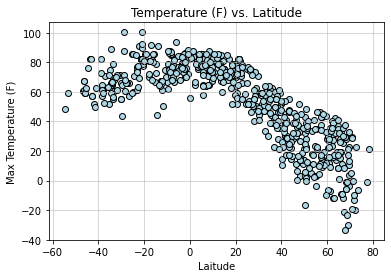

In [11]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(curr_weather_df["Lat"], curr_weather_df["Max Temp"], c = "lightblue", edgecolor = "black")

# Set title
plt.title("Temperature (F) vs. Latitude")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/Temperature (F) vs. Latitude.png")

## Latitude vs. Humidity Plot

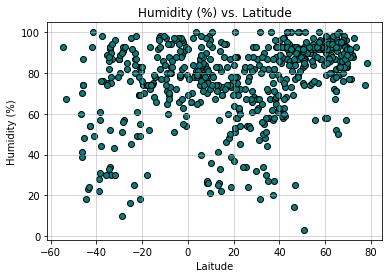

In [12]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(curr_weather_df["Lat"], curr_weather_df["Humidity"], c = "teal", edgecolor = "black")

# Set title
plt.title("Humidity (%) vs. Latitude")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/Humidity (%) vs. Latitude.png")

## Latitude vs. Cloudiness Plot

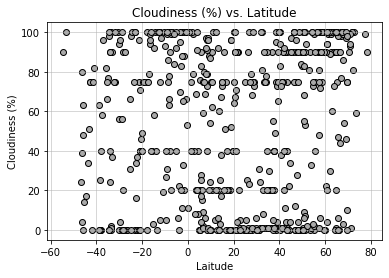

In [13]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(curr_weather_df["Lat"], curr_weather_df["Cloudiness"], c = "darkgray", edgecolor = "black")

# Set title
plt.title("Cloudiness (%) vs. Latitude")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/Cloudiness (%) vs. Latitude.png")

## Latitude vs. Wind Speed Plot

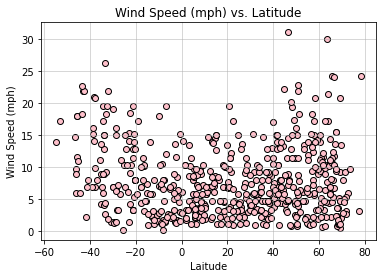

In [14]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(curr_weather_df["Lat"], curr_weather_df["Wind Speed"], c = "pink", edgecolor = "black")

# Set title
plt.title("Wind Speed (mph) vs. Latitude")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/Wind Speed (mph) vs. Latitude.png")

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
nrth_hs_df = curr_weather_df.loc[curr_weather_df["Lat"] >= 0]
sth_hs_df = curr_weather_df.loc[curr_weather_df["Lat"] < 0]

In [16]:
# Define function for calculating linear regression and scatter plot with linear regression plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, c = "lightblue", edgecolor = "black")
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def plot_annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


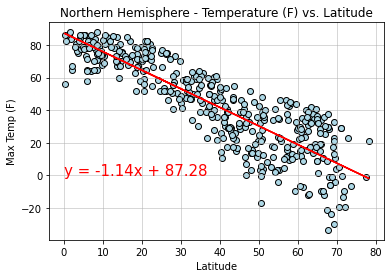

In [17]:
# Call function linear_regression
equation1 = linear_regression(nrth_hs_df["Lat"], nrth_hs_df["Max Temp"])

# Call function plot_annotate
plot_annotate(equation1, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("Images/Northern Hemisphere - Temperature (F) vs. Latitude.png")

Strong negative correaltion beacuse of winter season

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.47


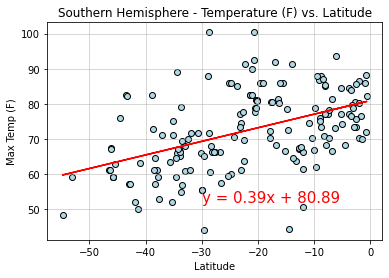

In [18]:
# Call function linear_regression
equation2 = linear_regression(sth_hs_df["Lat"],sth_hs_df["Max Temp"])

# Call function plot_annotate
plot_annotate(equation2, -30, 52)

# Set a title
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("Images/Southern Hemisphere - Temperature (F) vs. Latitude.png")

Moderate positive correlation beacuse of summer season

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.33


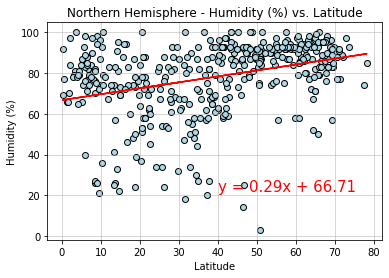

In [19]:
# Call function linear_regression
equation3 = linear_regression(nrth_hs_df["Lat"],nrth_hs_df["Humidity"])

# Call function plot_annotate
plot_annotate(equation3, 40, 22)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude.png")

Weak positive correlation

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.33


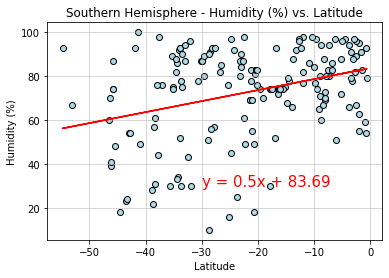

In [20]:
# Call function linear_regression
equation4 = linear_regression(sth_hs_df["Lat"], sth_hs_df["Humidity"])

# Call function plot_annotate
plot_annotate(equation4, -30, 30)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude.png")

Weak positive correlation

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.28


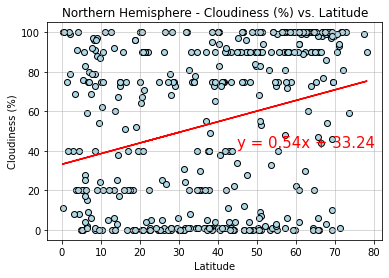

In [21]:
# Call function linear_regression
equation5 = linear_regression(nrth_hs_df["Lat"], nrth_hs_df["Cloudiness"])

# Call function plot_annotate
plot_annotate(equation5, 45, 42)

# Set title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

Weak positive correlation

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.21


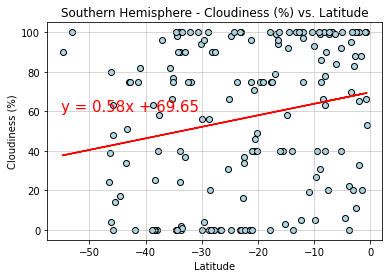

In [22]:
# Call function linear_regression
equation6 = linear_regression(sth_hs_df["Lat"], sth_hs_df["Cloudiness"])

# Call function plot_annotate
plot_annotate(equation6, -55, 60)

# Set title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

Weak positive correlation

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.18


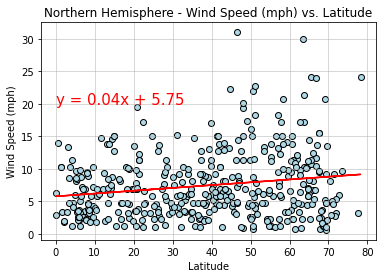

In [23]:
# Call function linear_regression
equation5 = linear_regression(nrth_hs_df["Lat"], nrth_hs_df["Wind Speed"])

# Call function plot_annotate
plot_annotate(equation5, 0, 20)

# Set title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

Very weak positive correlation

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.45


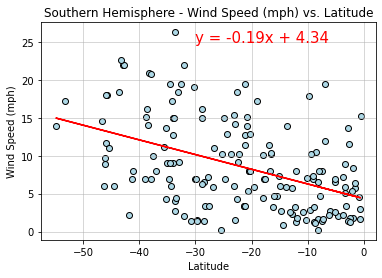

In [24]:
# Call function linear_regression
equation5 = linear_regression(sth_hs_df["Lat"], sth_hs_df["Wind Speed"])

# Call function plot_annotate
plot_annotate(equation5, -30, 25)

# Set title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")